<a href="https://colab.research.google.com/github/wanwanliang/ML_Practices/blob/main/Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3,5)
print(sys.version_info)

import sklearn
assert sklearn.__version__ >= '0.20'
print(sklearn.__version__)

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
0.22.2.post1


In [ ]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

# Linear Regression

## Linear regression using the Normal Equation

In [ ]:
x = 2 * np.random.rand(100,1)
print(len(x))
print(x.shape)
pd.DataFrame(x).describe()

100
(100, 1)


,0
count,100.000000
mean,0.981983
std,0.578950
min,0.035350
25%,0.523992
50%,0.936171
75%,1.402324
max,1.993373


In [ ]:
y = 4 + 3*x + 2*np.random.rand(100,1)

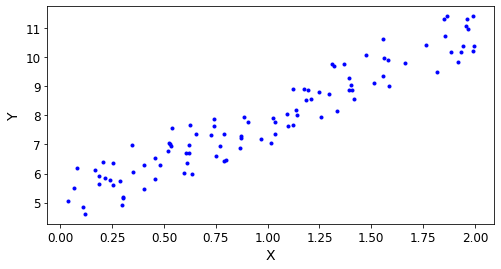

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel('Y')
plt.show()

In [ ]:
x_b = np.c_[np.ones((100, 1)), x]
print(len(x_b))
print(x_b.shape)
print(x_b[0:5])

theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

100
(100, 2)
[[1.         1.13887528]
 [1.         1.33592227]
 [1.         1.09797755]
 [1.         1.55532621]
 [1.         1.95796982]]


In [ ]:
theta_best

array([[4.99711978],
       [2.91884022]])

In [ ]:
 theta_best

array([[4.99711978],
       [2.91884022]])

In [ ]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 4.99711978],
       [10.83480022]])

In [ ]:
y_predict = x_b.dot(theta_best)

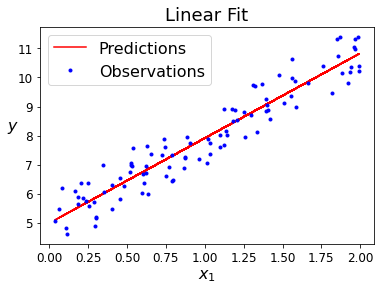

In [ ]:
plt.plot(x, y_predict, "r-", label="Predictions")
plt.plot(x, y, "b.", label="Observations")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0.5, fontsize=16)
plt.title("Linear Fit", fontsize=18)
plt.legend(loc = 'upper left', fontsize=16)
plt.show()


## Batch gradient descent

In [ ]:
lr = 1e-1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
  theta = theta - lr* gradients

In [ ]:
def plot_gradient_descent(theta, iteration, lr):
  m = len(x_b)

  plt.plot(x, y, 'b.')
  n_iterations = iteration

  for iteration in range(n_iterations):
    
    if iteration%50 == 0:

      y_predict = x_b.dot(theta)
      style = "b-" if iteration > 0 else "r--"
      plt.plot(x, y_predict, style)
    
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - lr*gradients

    plt.xlabel("$x_1$", fontsize=18)
    plt.title("$lr = {}$".format(lr), fontsize=16)

In [ ]:
theta_path_bgd = []

def plot_bgd_line(x, x_b, y, theta, lr, iterations):

  plt.plot(x, y, "b.")
  m = len(x)

  for iteration in range(iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - lr*gradients

    if iteration%10 == 0:
      y_predict = x_b.dot(theta)
      n = iteration//100
      plt.plot(x, y_predict, "r--", linewidth=0.2)

    theta_path_bgd.append(theta)

  plt.xlabel("$X$", fontsize=16)
  plt.ylabel("$Y$", fontsize=16)
  plt.title("$lr={}$".format(lr), fontsize=16)
  plt.show()

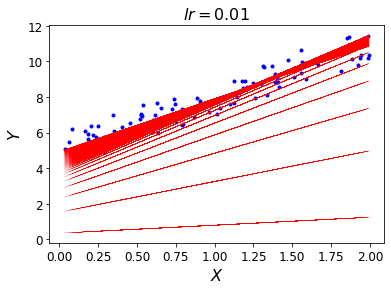

In [ ]:
theta_path_bgd = []
plt.plot(x, y, "b.")
m = len(x)
iterations = 1000
lr = 0.01
theta = np.random.randn(2,1)
for iteration in range(iterations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
  theta = theta - lr*gradients
  theta_path_bgd.append(theta)

  if iteration%10 == 0:
    y_predict = x_b.dot(theta)
    n = iteration//100
    plt.plot(x, y_predict, "r--", linewidth=0.2)


plt.xlabel("$X$", fontsize=16)
plt.ylabel("$Y$", fontsize=16)
plt.title("$lr={}$".format(lr), fontsize=16)
plt.show()

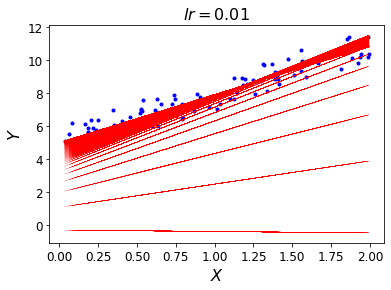

In [ ]:
theta = np.random.randn(2,1)
plot_bgd_line(x, x_b, y, theta, lr=0.01, iterations=5000)

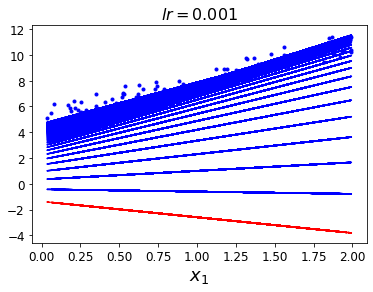

In [ ]:
plot_gradient_descent(theta, iteration=5000, lr=0.001)

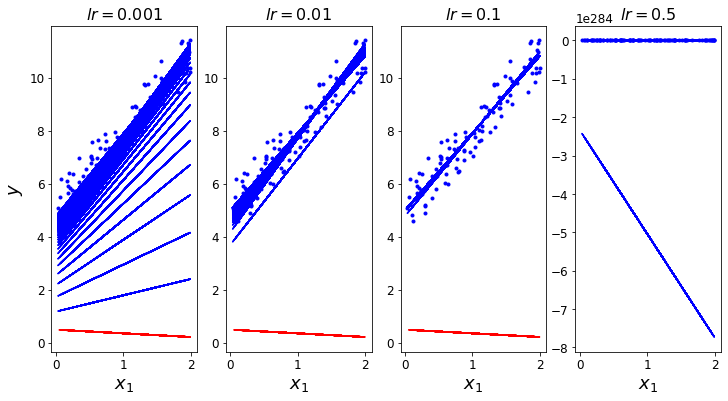

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(12,6))
plt.subplot(141); plot_gradient_descent(theta, iteration=5000, lr=0.001)
plt.ylabel('$y$', fontsize=18)
plt.subplot(142); plot_gradient_descent(theta, iteration=5000, lr=0.01)
plt.subplot(143); plot_gradient_descent(theta, iteration=5000, lr=0.1)
plt.subplot(144); plot_gradient_descent(theta, iteration=5000, lr=0.5)
plt.show()

In [ ]:
theta

array([[ 0.49671415],
       [-0.1382643 ]])

## Stochastic Gradient Descent

In [ ]:
theta_path_sgd = []
m = len(x_b)
np.random.seed(42)

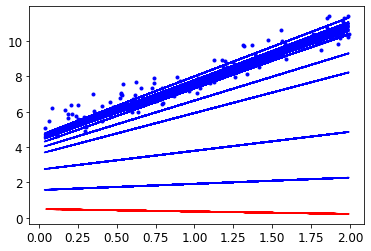

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta= np.random.randn(2,1)

for epoch in range(n_epochs):

  for i in range(m):

    if epoch==0 and i<20:
      y_predict = x_b.dot(theta)
      style = 'b-' if i>0 else "r--"
      plt.plot(x, y_predict, style)
    
    random_index = np.random.randint(m)
    xi = x_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]

    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    lr = learning_schedule(epoch*m +i)
    theta = theta - lr*gradients
    theta_path_sgd.append(theta)
plt.plot(x,y, "b.")
plt.show()


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.9473615]), array([2.91159091]))

## Mini-batch gradient descent

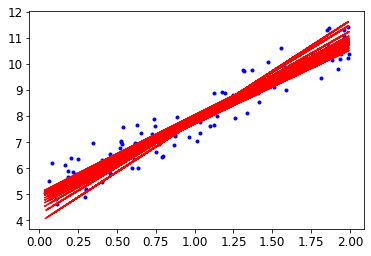

In [ ]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
  return t0/(t+t1)
t = 0

plt.plot(x, y,"b.")
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  x_b_shuffled = x_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]

  for i in range(0, m, minibatch_size):
    
    t += 1
    xi = x_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]

    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)- yi)
    lr = learning_schedule(t)
    theta = theta - lr* gradients
    theta_path_mgd.append(theta)

  y_predict = x_b.dot(theta)
  plt.plot(x, y_predict, "r--")

## All gradient descent plot

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

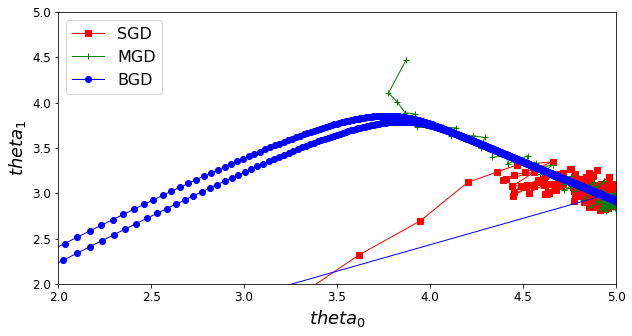

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 'r-s', linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], 'g-+', linewidth=1, label="MGD")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], 'b-o', linewidth=1, label="BGD")
plt.legend(loc='upper left', fontsize=16)
plt.axis([2,5, 2, 5 ])
plt.xlabel('$theta_0$', fontsize=18)
plt.ylabel('$theta_1$', fontsize=18)
plt.show()

# Polynomial regression

In [ ]:
m = 100
x= 6*np.random.rand(m,1)-3
y= 0.5*x**2 + x + 2 + np.random.randn(m, 1)

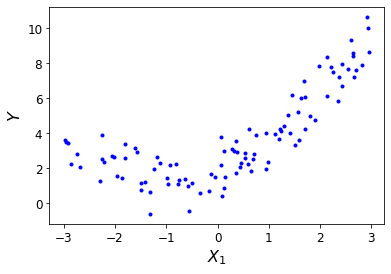

In [ ]:
plt.plot(x, y, "b.")
plt.xlabel('$X_1$', fontsize=16)
plt.ylabel('$Y$', fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])
print(x_poly.shape)

[1.9758854]
[1.9758854  3.90412313]
(100, 2)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92771132]), array([[1.03587088, 0.52768444]]))

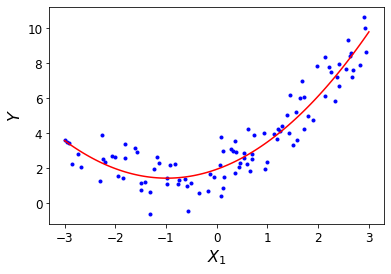

In [ ]:
x_new = np.linspace(-3,3, 100).reshape(100,1)
y_prediction = lin_reg.predict(poly_features.transform(x_new))

plt.plot(x, y, "b.")
plt.plot(x_new, y_prediction, "r-")
plt.xlabel('$X_1$', fontsize=16)
plt.ylabel('$Y$', fontsize=16)
plt.show()

In [ ]:
np.linspace(-3,3,10).reshape(10,1).shape

(10, 1)

# Regularized Models

In [ ]:
np.random.seed(42)

m = 20
x = 3*np.random.rand(m,1)
y = 1 + 0.5*x + np.random.randn(m,1)/1.5
x_new = np.linspace(0,3, 100).reshape(100,1)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

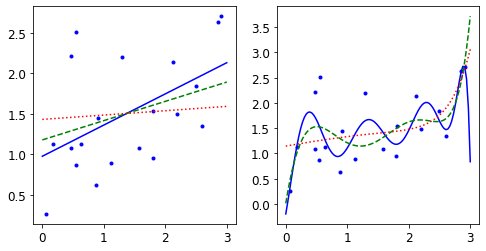

In [ ]:
def plot_model(model_class, polynomial, alphas, random_state):

  plt.plot(x,y,"b.")

  for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):

    model = model_class(alpha) if alpha >0 else LinearRegression()

    if polynomial:

      model = Pipeline([
              ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
              ('std_scaler', StandardScaler()),
              ('regul_reg', model),            
      ])

    model.fit(x, y)
    y_new = model.predict(x_new)
    lw = 2 if alpha>0 else 1
    plt.plot(x_new, y_new, style,label='alpha={}'.format(alpha))

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0,1e-5,1), random_state=42)




In [ ]:
def plot_model(model_class, polynomial, alphas, random_state):

  plt.plot(x, y, "b.")

  for alpha, style in zip(alphas, ('r-', 'g--', 'b:')):

    model = model_class(alpha) if alpha>0 else LinearRegression()

    if polynomial:

      model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=10, include_bias=False)), 
          ('std_scaler', StandardScaler()),
          ('regul_reg', model)             
      ])
    model.fit(x,y)
    y_new = model.predict(x_new)

    plt.plot(x_new, y_new, style, label='alpha={}'.format(alpha))
    plt.legend(loc="upper left")

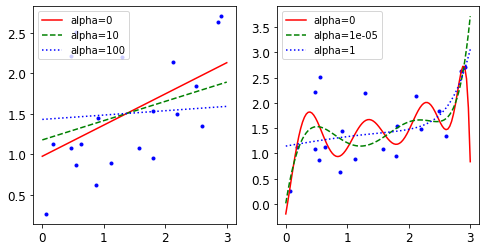

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 1e-5, 1), random_state=42)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.763952653967144, tolerance: 0.0009294783355207351
  positive)


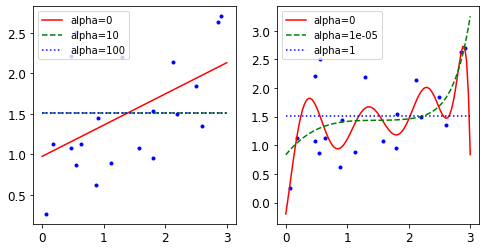

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-5, 1), random_state=42)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.784378026839408, tolerance: 0.0009294783355207351
  positive)


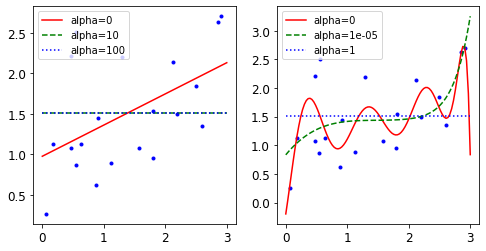

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 1e-5, 1), random_state=42)
plt.show()

 # Logistic Regression 

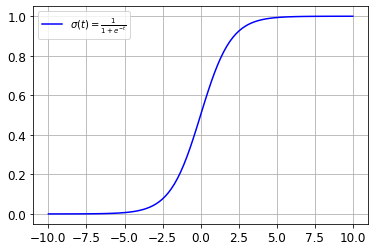

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1/(1 + np.exp(-t))

plt.plot(t, sig, "b-", label = r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
#plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
x = iris['data']
pd.DataFrame(x).head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.linear_model import LogisticRegression

x = iris['data'][:, 3:]
print(x.shape)
y = (iris['target']==2).astype(np.int)

(150, 1)


In [ ]:
log_reg = LogisticRegression(solver = "lbfgs", random_state=42)
log_reg.fit(x,y)
y_pred = log_reg.predict(x)
y_pred_prob = log_reg.predict_proba(x)

x_new = np.linspace(0, 3, 1000).reshape(1000, 1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:,1]>= 0.5][0]

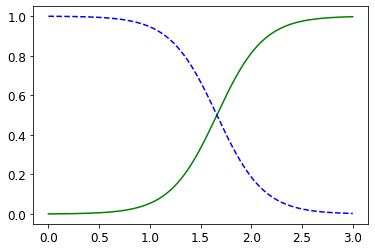

In [ ]:
plt.plot(x_new, y_proba[:, 1], "g-")
plt.plot(x_new, y_proba[:, 0], 'b--')
plt.show()

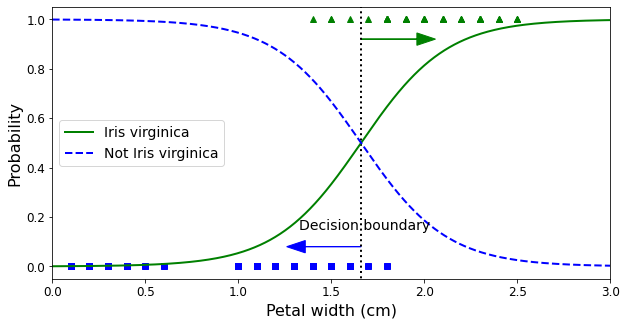

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x[y==0], y[y==0], 'bs')
plt.plot(x[y==1], y[y==1], 'g^')
plt.plot([threshold, threshold], [-1, 2], 'k:', linewidth=2)
plt.plot(x_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris virginica')
plt.plot(x_new, y_proba[:, 0], 'b--', linewidth=2, label="Not Iris virginica")
plt.text(threshold+0.02, 0.15, "Decision boundary", fontsize=14, color='k',ha="center")
plt.arrow(threshold, 0.08, -0.3,0, head_width=0.05, head_length=0.1, fc='b',ec='b')
plt.arrow(threshold, 0.92, 0.3,0, head_width=0.05, head_length=0.1, fc='g',ec='g')
plt.xlabel('Petal width (cm)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(loc='center left', fontsize=14)
plt.axis([0, 3, -0.05, 1.05])
plt.show()

In [ ]:
x = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.int)

log_reg = LogisticRegression(solver='lbfgs', C=10**10, random_state=42 )
log_reg.fit(x,y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1,1),
    np.linspace(0.8, 2.7, 200).reshape(-1,1)
)

x_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(x_new)

print(x0.shape)
print(x1.shape)

(200, 500)
(200, 500)


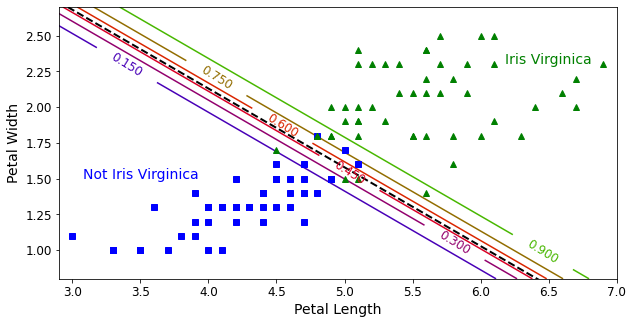

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x[y==0, 0], x[y==0, 1], 'bs')
plt.plot(x[y==1, 0], x[y==1, 1], 'g^')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap= plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=2)
plt.text(3.5, 1.5, 'Not Iris Virginica', fontsize=14, color='b', ha='center')
plt.text(6.5, 2.3, "Iris Virginica", fontsize=14, color='g', ha='center')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y) 

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ts = np.linspace(2.9, 7, 500).reshape(-1, 1)
ts.shape

(500, 1)

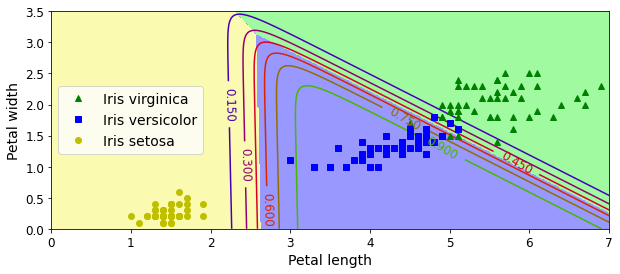

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()